In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import os
import seaborn as sns

In [86]:
os.listdir('../results/')

['.DS_Store',
 'prostate_val_fcnn',
 'prostate_val',
 'prostate_val_svm',
 'prostate_val_random_net',
 'prostate_val_rf']

In [108]:
pnet_aucs = []
for i in range(10):
    auc = torch.load('../results/prostate_val/run{}/AUC.pt'.format(i))
    pnet_aucs.append(auc.item())

In [109]:
sparse_aucs = []
for i in range(10):
    auc = torch.load('../results/prostate_val_random_net/run{}/AUC.pt'.format(i))
    sparse_aucs.append(auc.item())

In [110]:
fcnn_aucs = []
for i in range(10):
    auc = torch.load('../results/prostate_val_fcnn/run{}/AUC.pt'.format(i))
    fcnn_aucs.append(auc.item())

In [111]:
svm_aucs = []
for i in range(10):
    auc = torch.load('../results/prostate_val_svm/run{}/AUC.pt'.format(i))
    svm_aucs.append(auc.item())

In [112]:
rf_aucs = []
for i in range(10):
    auc = torch.load('../results/prostate_val_rf/run{}/AUC.pt'.format(i))
    rf_aucs.append(auc.item())

In [113]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [114]:
os.listdir('../figures/')

['ploidy_cutoff_selection.pdf',
 'ploidy_sankey_diagram.html',
 '.DS_Store',
 'ploidy_by_tumortype.pdf',
 'pnet_performance_rank_variance.pdf',
 'ploidy_vs_misclass_by_tumortype.pdf',
 'ICML_submission_figures.pdf',
 'pnet_performance_benchmark.pdf',
 'figures',
 'SKCM_ploidy_TCGA_vs_Liu.pdf',
 'cna_vs_ploiy_top_genes.pdf',
 'prediction_by_tumortype.pdf',
 'ploidy_sankey_diagram.pdf',
 'genes_ploidy.pdf',
 'ploidy_sankey_diagram.png']

In [120]:
perf_order = list(auc_df.mean().sort_values(ascending=False).index)

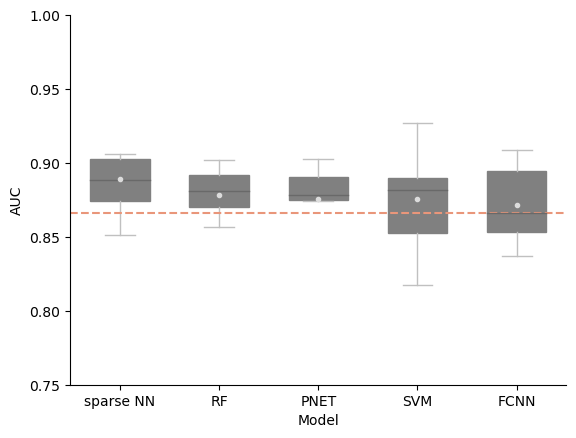

In [123]:
plt.clf()
auc_df = pd.DataFrame({'PNET': pnet_aucs, 'sparse NN': sparse_aucs, 'FCNN': fcnn_aucs, 'RF': rf_aucs, 'SVM': svm_aucs})

auc_df[perf_order].boxplot(showfliers=False,
           color=dict(boxes='grey', whiskers='silver', medians='dimgray', caps='silver'), widths=0.6,
               patch_artist=True, showmeans=True, 
               meanprops={"marker":".","markerfacecolor":"gainsboro", "markeredgecolor":"gainsboro"})
plt.ylim((0.75,1))
plt.grid(False)
plt.axhline(y=auc_df['FCNN'].median(), color='darksalmon', linestyle='--')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.savefig('../figures/pnet_performance_benchmark.pdf')
plt.show()

In [124]:
df = pd.DataFrame()
for i in range(10):
    gene_imps = pd.read_csv('../results/prostate_val/run{}/gene_importances.csv'.format(i))
    df['run_{}'.format(i)] = gene_imps.set_index('Unnamed: 0').mean().rank(ascending=False)

pnet_rank_var = df.loc[df.mean(axis=1).nsmallest(50).index].std(axis=1).median()
print('Varience in ranking: ',pnet_rank_var)
pnet_imps = df.mean(axis=1)

Varience in ranking:  88.31026739391449


In [125]:
df = pd.DataFrame()
for i in range(10):
    gene_imps = pd.read_csv('../results/prostate_val_random_net/run{}/gene_importances.csv'.format(i))
    df['run_{}'.format(i)] = gene_imps.set_index('Unnamed: 0').mean().rank(ascending=False)
rnet_rank_var = df.loc[df.mean(axis=1).nsmallest(50).index].std(axis=1).nsmallest(100).median()
print('Varience in ranking: ',rnet_rank_var)
rnet_imps = df.mean(axis=1)

Varience in ranking:  101.40088172875906


In [126]:
df = pd.DataFrame()
for i in range(10):
    gene_imps = pd.read_csv('../results/prostate_val_fcnn/run{}/gene_importances.csv'.format(i))
    df['run_{}'.format(i)] = gene_imps.set_index('Unnamed: 0').mean().rank(ascending=False)
fnet_rank_var = df.loc[df.mean(axis=1).nsmallest(50).index].std(axis=1).nsmallest(100).median()
print('Varience in ranking: ',fnet_rank_var)
fnet_imps = df.mean(axis=1)

Varience in ranking:  366.9055852806802


In [127]:
df = pd.DataFrame()
for i in range(10):
    gene_imps = pd.read_csv('../results/prostate_val_rf/run{}/gene_feature_importances.csv'.format(i))
    gene_imps = gene_imps.set_index('Unnamed: 0')
    gene_imps = pd.DataFrame(gene_imps.values.reshape((3, 4854)).T.sum(axis=1),
                             index=gene_imps.index[:4854],
                             columns=['gene_imp']).rank(ascending=False)
    df['run_{}'.format(i)] = gene_imps['gene_imp']
rf_rank_var = df.loc[df.mean(axis=1).nsmallest(50).index].std(axis=1).nsmallest(100).median()
print('Varience in ranking: ',rf_rank_var)
rf_imps = df.mean(axis=1)

Varience in ranking:  55.486968540423845


In [128]:
df = pd.DataFrame()
for i in range(10):
    gene_imps = pd.read_csv('../results/prostate_val_svm/run{}/gene_feature_importances.csv'.format(i))
    gene_imps = gene_imps.set_index('Unnamed: 0')
    gene_imps = pd.DataFrame(gene_imps.values.reshape((3, 4854)).T.sum(axis=1),
                             index=gene_imps.index[:4854],
                             columns=['gene_imp']).rank(ascending=False)
    df['run_{}'.format(i)] = gene_imps['gene_imp']
svm_rank_var = df.loc[df.mean(axis=1).nsmallest(50).index].std(axis=1).nsmallest(100).median()
print('Varience in ranking: ',svm_rank_var)
svm_imps = df.mean(axis=1)

Varience in ranking:  49.47814796621172


In [129]:
plotting_df = pd.DataFrame(auc_df.median(), columns=['AUC'])
plotting_df['rank_var'] = [pnet_rank_var, rnet_rank_var, fnet_rank_var, rf_rank_var, svm_rank_var]
plotting_df['model'] = plotting_df.index

In [130]:
plotting_df

,AUC,rank_var,model
PNET,0.878611,88.310267,PNET
sparse NN,0.888525,101.400882,sparse NN
FCNN,0.866138,366.905585,FCNN
RF,0.881016,55.486969,RF
SVM,0.881907,49.478148,SVM


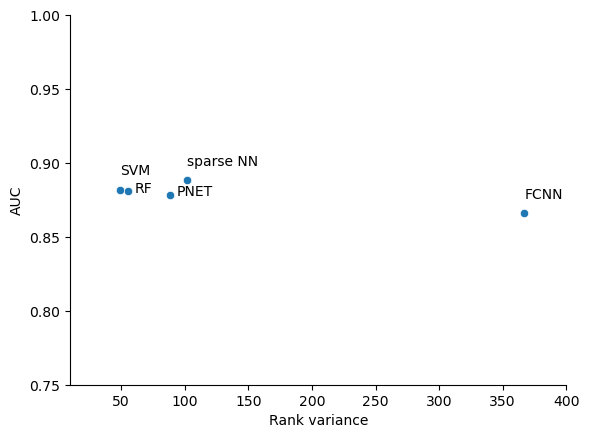

In [147]:
plt.clf()
ax = sns.scatterplot(plotting_df, y='AUC', x='rank_var')
plt.ylim((0.75,1))
plt.xlim((10, 400))
plt.xlabel('Rank variance')
for i, txt in enumerate(plotting_df.model):
    if txt=='RF':
        ax.annotate(txt, (5+plotting_df.loc[txt]['rank_var'], plotting_df.loc[txt]['AUC']-0.001))
    elif txt=='PNET':
        ax.annotate(txt, (5+plotting_df.loc[txt]['rank_var'], plotting_df.loc[txt]['AUC']-0.001))
    else:
        ax.annotate(txt, (plotting_df.loc[txt]['rank_var'], 0.01+plotting_df.loc[txt]['AUC']))


plt.savefig('../figures/pnet_performance_rank_variance.pdf')
plt.show()
